In [ ]:
import pandas as pd
import json
import os

In [ ]:
from tasks.download import download_data
download_data(fresh_start=False)

In [ ]:
from tasks.preprocess import preprocess_MANUAL_files
preprocess_MANUAL_files()

In [ ]:
from tasks.preprocess import preprocess_API_files
preprocess_API_files()

In [ ]:
from tasks.compute_indicators import compute_indicators
compute_indicators()

In [1]:
from tasks.process import process_indicators
process_indicators()

Processing GV1: 
	 Processing GV1_WB.csv
	 Imputation:DONE
	 Outlier removal:DONE
	 Formatting:DONE
	 saving at data/indicator/GV1/processed/GV1_WB.csv
Processing EE2: 
	 Processing EE2_WB.csv
	 Imputation:DONE
	 Outlier removal:DONE
	 Formatting:DONE
	 saving at data/indicator/EE2/processed/EE2_WB.csv
	 Processing EE2_SDG.csv
	 Imputation:DONE
	 Outlier removal:DONE
	 Formatting:DONE
	 saving at data/indicator/EE2/processed/EE2_SDG.csv
Processing SE2: 
	 Processing sub indicators from SE2.0_WB.csv, SE2.1_WB.csv, SE2.2_WB.csv, SE2.3_WB.csv, SE2.4_WB.csv, SE2.5_WB.csv
	 Imputation:DONE
	 Outlier removal:DONE
	 Formatting:DONE
	 Imputation:DONE
	 Outlier removal:DONE
	 Formatting:DONE
	 Imputation:DONE
	 Outlier removal:DONE
	 Formatting:DONE
	 Imputation:DONE
	 Outlier removal:DONE
	 Formatting:DONE
	 Imputation:DONE
	 Outlier removal:DONE
	 Formatting:DONE
	 Imputation:DONE
	 Outlier removal:DONE
	 Formatting:DONE
	 Computing SE2 for SE2_WB.csv: DONE
	 Imputation:DONE
	 Outlier removal

	 Imputation:DONE
	 Outlier removal:DONE
	 Formatting:DONE
saving at data/indicator/AB1/processed/AB1_SDG.csv
	 Processing sub indicators from AB1.0_WB.csv, AB1.1_WB.csv
	 Imputation:DONE
	 Outlier removal:DONE
	 Formatting:DONE
	 Imputation:DONE
	 Outlier removal:DONE
	 Formatting:DONE
	 Computing AB1 for AB1_WB.csv: DONE
	 Imputation:DONE
	 Outlier removal:DONE
	 Formatting:DONE
saving at data/indicator/AB1/processed/AB1_WB.csv
Processing SL2: 
	 Processing SL2_origin.M.csv
	 Imputation:DONE
	 Outlier removal:DONE
	 Formatting:DONE
	 saving at data/indicator/SL2/processed/SL2_origin.M.csv
Processing EQ3: 
	 Processing EQ3_origin.M.csv
	 Imputation:DONE
	 Outlier removal:DONE
	 Formatting:DONE
	 saving at data/indicator/EQ3/processed/EQ3_origin.M.csv
Processing GB1: 
	 Processing GB1_SDG.csv
	 Imputation:DONE
	 Outlier removal:DONE
	 Formatting:DONE
	 saving at data/indicator/GB1/processed/GB1_SDG.csv
	 Processing GB1_WB.csv
	 Imputation:DONE
	 Outlier removal:DONE
	 Formatting:DONE
	

In [2]:
from tasks.compute_index import compute_index 
compute_index(save=True)

Computing Index:
Computation: Saving 2005's results
Saving 2006's results
Saving 2007's results
Saving 2008's results
Saving 2009's results
Saving 2010's results
Saving 2011's results
Saving 2012's results
Saving 2013's results
Saving 2014's results
Saving 2015's results
Saving 2016's results
Saving 2017's results
Saving 2018's results
Saving 2019's results
Saving 2020's results
saving at data/full_data/result.csv


In [3]:
from tasks.post_process import make_timeseries_excel, make_imputation_report, make_data_report

make_timeseries_excel()
make_imputation_report()
make_data_report()

AB1
AB2


/home/simon/GreenGrowthInstitute/Anticipe/tasks/post_process.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_formatted['Year'] = df_formatted['Year'].astype(int)


AB3
BE1
BE2
BE3
CV1
CV2
CV3
EE1
EE2
EQ1
EQ2
EQ3
EW1
EW2
GB1
GB2
GB3
GE1
GE2
GE3
GJ1
GN1
GT1
GV1
ME1
ME2
SE1
SE2
SE3
SL1
SL2
SP1
SP2
SP3
AB
BE
CV
EE
EQ
EW
GB
GE
GJ
GN
GT
GV
ME
SE
SL
SP
SI
NCP
ESRU
GEO
Index


In [5]:
import pandas as pd
test = pd.read_csv('data/full_data/result.csv')

In [10]:
test.query("Variable == 'Index' and Year == 2020").sort_values(by='Value').tail(20)

,ISO,Variable,Value,Aggregation,Year,Country,Continent,UNregion,IncomeLevel,Region
112399,FRA,Index,66.702009,Index,2020.0,France,Europe,Western Europe,High income,Europe & Central Asia
260373,POL,Index,67.115660,Index,2020.0,Poland,Europe,Eastern Europe,High income,Europe & Central Asia
79808,HRV,Index,67.167850,Index,2020.0,Croatia,Europe,Southern Europe,High income,Europe & Central Asia
229271,NLD,Index,67.604003,Index,2020.0,Netherlands,Europe,Western Europe,High income,Europe & Central Asia
261861,PRT,Index,67.976035,Index,2020.0,Portugal,Europe,Southern Europe,High income,Europe & Central Asia
289956,SVN,Index,68.062304,Index,2020.0,Slovenia,Europe,Southern Europe,High income,Europe & Central Asia
178983,LVA,Index,68.134795,Index,2020.0,Latvia,Europe,Northern Europe,High income,Europe & Central Asia
267780,ROU,Index,68.317641,Index,2020.0,Romania,Europe,Eastern Europe,High income,Europe & Central Asia
318020,CHE,Index,68.340321,Index,2020.0,Switzerland,Europe,Western Europe,High income,Europe & Central Asia
147855,HUN,Index,69.067235,Index,2020.0,Hungary,Europe,Eastern Europe,High income,Europe & Central Asia


<AxesSubplot:xlabel='Year'>

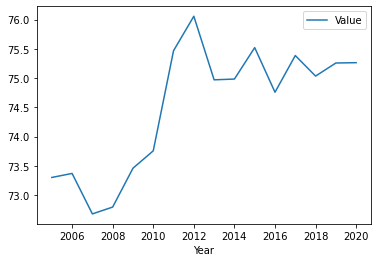

In [17]:
test.query("Variable == 'Index' and ISO == 'DNK'").plot(x='Year', y='Value')

In [14]:
test.query("Variable == 'Index' and Year == 2018").sort_values(by='Value').tail(20)

,ISO,Variable,Value,Aggregation,Year,Country,Continent,UNregion,IncomeLevel,Region
112213,FRA,Index,66.721916,Index,2018.0,France,Europe,Western Europe,High income,Europe & Central Asia
260187,POL,Index,67.130750,Index,2018.0,Poland,Europe,Eastern Europe,High income,Europe & Central Asia
79622,HRV,Index,67.266400,Index,2018.0,Croatia,Europe,Southern Europe,High income,Europe & Central Asia
229085,NLD,Index,67.552725,Index,2018.0,Netherlands,Europe,Western Europe,High income,Europe & Central Asia
261675,PRT,Index,67.680908,Index,2018.0,Portugal,Europe,Southern Europe,High income,Europe & Central Asia
178797,LVA,Index,67.837722,Index,2018.0,Latvia,Europe,Northern Europe,High income,Europe & Central Asia
289770,SVN,Index,67.860484,Index,2018.0,Slovenia,Europe,Southern Europe,High income,Europe & Central Asia
317834,CHE,Index,68.162831,Index,2018.0,Switzerland,Europe,Western Europe,High income,Europe & Central Asia
267594,ROU,Index,68.263954,Index,2018.0,Romania,Europe,Eastern Europe,High income,Europe & Central Asia
101830,EST,Index,69.458107,Index,2018.0,Estonia,Europe,Northern Europe,High income,Europe & Central Asia
